백신을 가장 적게 맞은 날짜 : 2020-12-05 : 0회
백신을 가장 많이 맞은 날짜 : 2021-06-27 : 43919121회


                    접종 국가수
Oxford/AstraZeneca     183
Pfizer/BioNTech        158
Sinopharm/Beijing       90
Moderna                 90
Johnson&Johnson         89
Sputnik V               58
Sinovac                 51
Novavax                 11
Covaxin                  9
Sputnik Light            8
CanSino                  7
Abdala                   4
Soberana02               4
ZF2001                   3
Sinopharm/Wuhan          2
QazVac                   2
EpiVacCorona             2
Soberana Plus            1
COVIran Barekat          1
FAKHRAVAC                1
Razi Cov Pars            1
SpikoGen                 1
Medigen                  1
Turkovac                 1




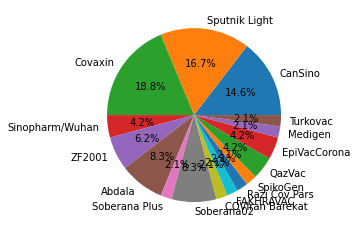

In [70]:
import csv
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

with open("country_vaccinations.csv", "r") as f:
    data = csv.reader(f)
    data = list(data)

    d = defaultdict(int)
    for i in data[1:]:
        if i[7] == "": continue
        d[i[2]] += float(i[7])
    mini = float("inf")
    maxi = float('-inf')
    min_date = max_date = ""
    for i in d:
        if mini > d[i]:
            mini = d[i]
            min_date = i
        if maxi < d[i]:
            maxi = d[i]
            max_date = i
    print(f"백신을 가장 적게 맞은 날짜 : {min_date} : {int(mini)}회")
    print(f"백신을 가장 많이 맞은 날짜 : {max_date} : {int(maxi)}회", end='\n\n\n')

    vaccines = defaultdict(set)
    for i in data[1:]:
        for v in i[12].split(", "):
            vaccines[v].add(i[0])
    # for i in vaccines:
    #     print(i, len(vaccines[i]))
    t = sorted([(i, len(vaccines[i])) for i in vaccines], key=lambda x: -x[1])
    df = pd.DataFrame([x[1] for x in t],
                      columns=["접종 국가수"],
                      index=[x[0] for x in t])

    print(df, end='\n\n\n')

    others = [(x, vaccines[x]) for x in vaccines if len(vaccines[x]) < 10]
    #print(others)
    plt.pie([len(x[1]) for x in others], labels=[x[0] for x in others], autopct='%.1f%%')
    plt.show()